Pentru imaginile care contin biciclete:

a. sa se localizeze automat bicicletele in aceste imagini si sa se evidentieze chenarele care incadreaza bicicletele

In [ ]:
from PIL.ImageOps import contain
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from matplotlib import pyplot as plt
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time

os.environ["VISION_KEY"] ="Key"
os.environ["VISION_ENDPOINT"] ="api"
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
folder_path = "images/bikes/"
files = os.listdir(folder_path)

bicycle_prediction = []
bicycle_prediction_bb = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    img = plt.imread(file_path)
    img_binaries = open(file_path, "rb")
    result = computervision_client.analyze_image_in_stream(img_binaries, visual_features=[VisualFeatureTypes.objects])

    for ob in result.objects:
       if ob.object_property == "bicycle":
        if file_path not in bicycle_prediction_bb:
            bicycle_prediction_bb[file_path] = []
        bicycle_prediction_bb[file_path].append([
            ob.rectangle.x,
            ob.rectangle.y,
            ob.rectangle.x + ob.rectangle.w,
            ob.rectangle.y + ob.rectangle.h
        ])

print(bicycle_prediction_bb)

{'images/bikes/bike01.jpg': [[3, 16, 412, 410]], 'images/bikes/bike02.jpg': [[9, 90, 366, 321]], 'images/bikes/bike03.jpg': [[155, 153, 338, 405]], 'images/bikes/bike04.jpg': [[0, 2, 414, 412]], 'images/bikes/bike05.jpg': [[66, 36, 349, 335]], 'images/bikes/bike07.jpg': [[51, 206, 308, 416]], 'images/bikes/bike09.jpg': [[4, 14, 371, 402]], 'images/bikes/bike11.jpeg': [[1, 27, 148, 283], [254, 24, 386, 282]]}


images/bikes/bike01.jpg [[3, 16, 412, 410]]


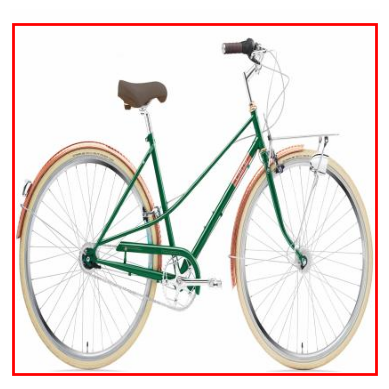

images/bikes/bike02.jpg [[9, 90, 366, 321]]


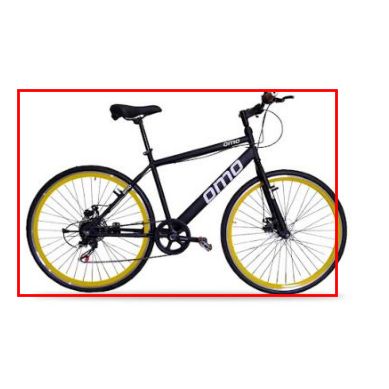

images/bikes/bike03.jpg [[155, 153, 338, 405]]


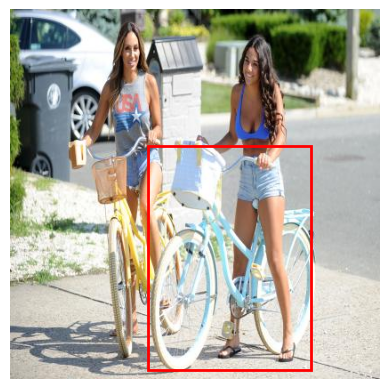

images/bikes/bike04.jpg [[0, 2, 414, 412]]


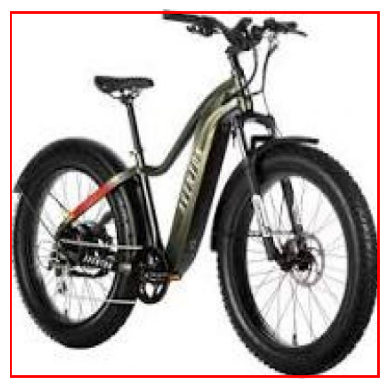

images/bikes/bike05.jpg [[66, 36, 349, 335]]


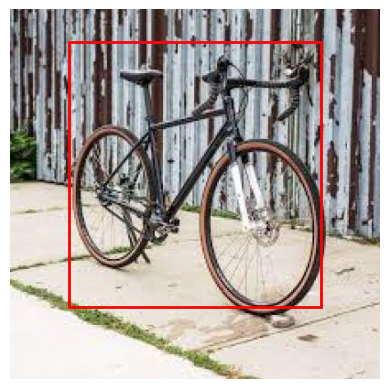

images/bikes/bike07.jpg [[51, 206, 308, 416]]


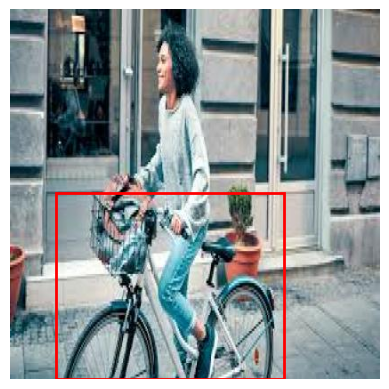

images/bikes/bike09.jpg [[4, 14, 371, 402]]


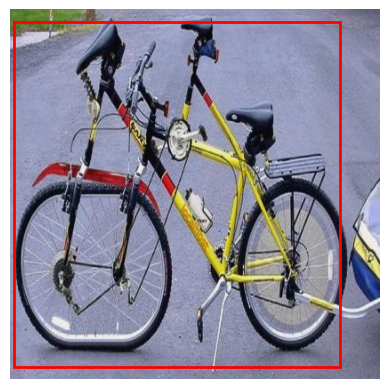

images/bikes/bike11.jpeg [[1, 27, 148, 283], [254, 24, 386, 282]]


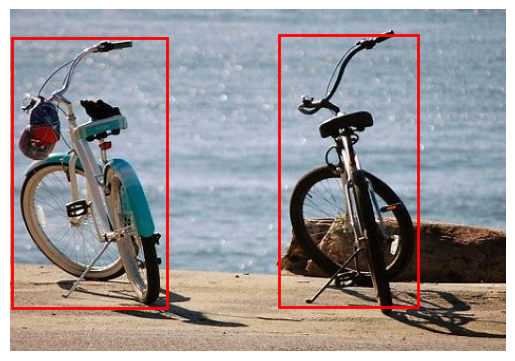

In [104]:
for key, value in bicycle_prediction_bb.items():
    print(key, value)
    im = plt.imread(key)
    fig = plt.imshow(im)
    for v in value:
        fig.axes.add_patch(plt.Rectangle(xy = (v[0], v[1]), width = v[2]-v[0], height = v[3]-v[1], fill = False, color = "red", linewidth = 2))
    plt.axis("off")
    plt.show()

b. sa se eticheteze (fara ajutorul algoritmilor de AI) aceste imagini cu chenare care sa incadreze cat mai exact bicicletele. Care task dureaza mai mult (cel de la punctul a sau cel de la punctul b)?

images/bikes/bike01.jpg [[3, 30, 412, 410]]


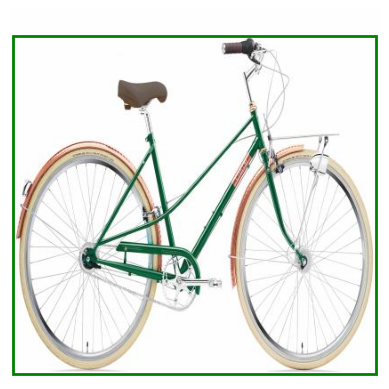

images/bikes/bike02.jpg [[17, 90, 380, 321]]


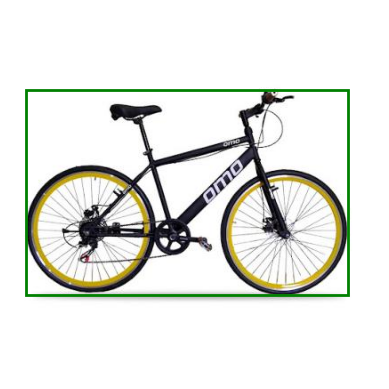

images/bikes/bike03.jpg [[85, 153, 345, 405]]


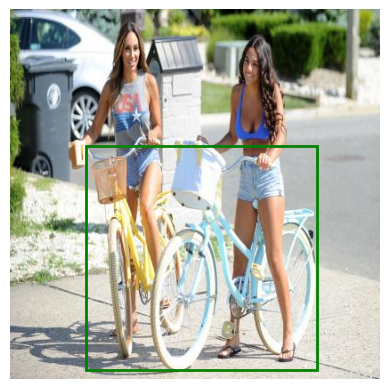

images/bikes/bike04.jpg [[0, 1, 414, 412]]


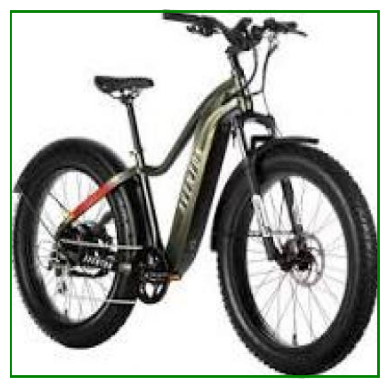

images/bikes/bike05.jpg [[67, 50, 355, 345]]


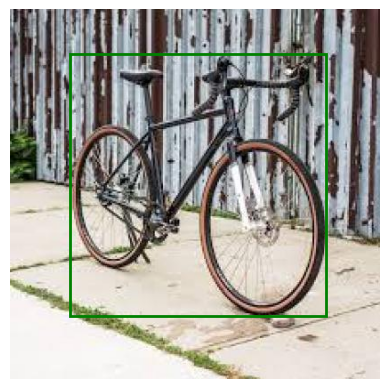

images/bikes/bike06.jpg [[85, 153, 345, 405]]


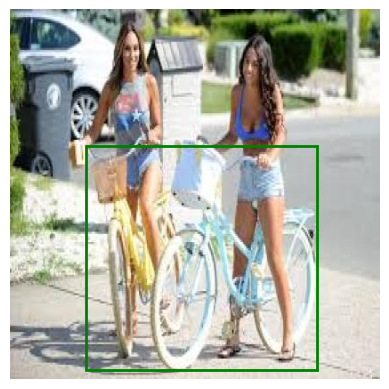

images/bikes/bike07.jpg [[57, 206, 299, 416]]


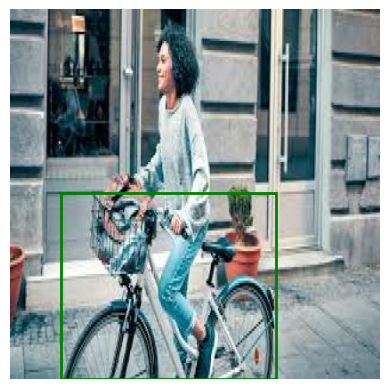

images/bikes/bike08.jpg [[54, 0, 387, 356]]


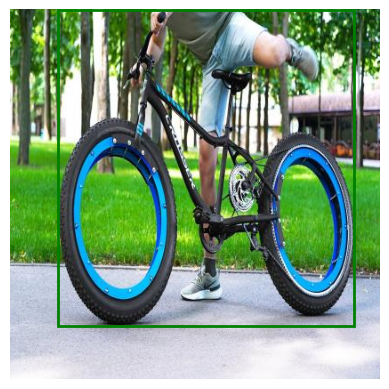

images/bikes/bike09.jpg [[5, 5, 380, 390]]


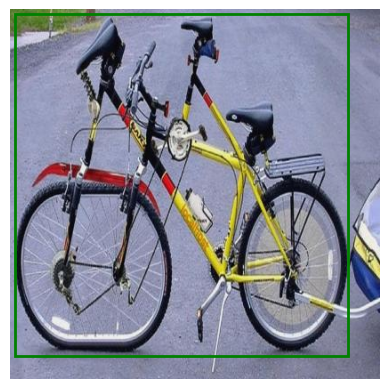

images/bikes/bike11.jpeg [[7, 27, 142, 280], [264, 17, 384, 289]]


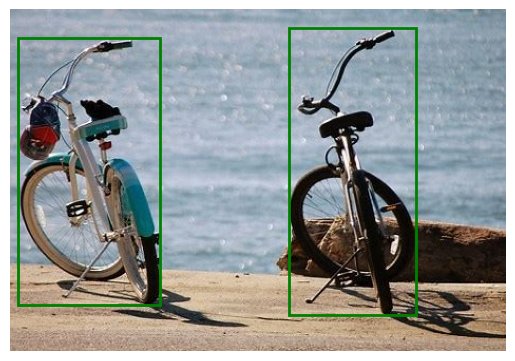

In [105]:
bicycle_groundTruth_bb = {}
bicycle_groundTruth_bb['images/bikes/bike01.jpg'] = [[3, 30, 412, 410]]
bicycle_groundTruth_bb['images/bikes/bike02.jpg'] = [[17, 90, 380, 321]]
bicycle_groundTruth_bb['images/bikes/bike03.jpg'] = [[85, 153, 345, 405]]
bicycle_groundTruth_bb['images/bikes/bike04.jpg'] = [[0, 1, 414, 412]]
bicycle_groundTruth_bb['images/bikes/bike05.jpg'] = [[67, 50, 355, 345]]
bicycle_groundTruth_bb['images/bikes/bike06.jpg'] = [[85, 153, 345, 405]]
bicycle_groundTruth_bb['images/bikes/bike07.jpg'] = [[57, 206, 299, 416]]
bicycle_groundTruth_bb['images/bikes/bike08.jpg'] = [[54, 0, 387, 356]]
bicycle_groundTruth_bb['images/bikes/bike09.jpg'] = [[5, 5, 380, 390]]
bicycle_groundTruth_bb['images/bikes/bike11.jpeg'] = [[7, 27, 142, 280], [264, 17, 384, 289]]

for key, value in bicycle_groundTruth_bb.items():
    print(key, value)
    im = plt.imread(key)
    fig = plt.imshow(im)
    for v in value:
        fig.axes.add_patch(plt.Rectangle(xy = (v[0], v[1]), width = v[2]-v[0], height = v[3]-v[1], fill = False, color = "green", linewidth = 2))
    plt.axis("off")
    plt.show()


c. sa se determine performanta algoritmului de la punctul a avand in vedere etichetarile realizate la punctul b (se vor folosi cel putin 2 metrici).

In [106]:
total_poze_biciclete = 10
poze_fara_biciclete = 10
TP = 8 # numarul de poze determinat corect de algoritm
FN = 2 # numarul de poze cand o poza are bicicleta dar nu a fost determinata de algoritm
TN = 10 # numarul de poze care nu au biciclete si au fost determinate corect
FP = 0 # numarul de poze care nu au biciclete dar algoritmul spune ca au

accuracy = (TP + TN)/(TP + FN + TN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"accuracy = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")

accuracy = 0.9
precision = 1.0
recall = 0.8
